In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from DataExploration.dexp import DataExplorationFrameFactory, StatisticsReport, DataframeUtils
from dexp.MergedResultFactory import MergedResultFactory

# plt.rcParams["figure.figsize"] = [25.50, 125.50]
# plt.rcParams["figure.autolayout"] = True
# sns.set(font_scale=4)

In [2]:
# constants
notifier_data_path = "../performance_tests/notifier"
pub_sub_data_path = "../performance_tests/pubsub"

In [3]:
notifier_dfs = DataExplorationFrameFactory.generate_notifier_dataframes(notifier_data_path)
pub_sub_dfs = DataExplorationFrameFactory.generate_pub_sub_dataframes(pub_sub_data_path)
factory = MergedResultFactory(notifier_dfs, pub_sub_dfs)
df = factory.combine_dfs()

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
notifier_stats_report = StatisticsReport(notifier_dfs)
stats_df = notifier_stats_report.create_dataframe()
stats_df.head(n = 50)

,sub_count,Q1,Q2,Q3,Q4,Standard Deviation,Median,Mode
0,2,0.000195,0.000223,0.000244,0.009202,0.000236,0.000223,"0.0002262592315673,0.0002534389495849"
1,4,0.000266,0.000301,0.000353,0.015247,0.000682,0.000301,"0.0002634525299072,0.0002651214599609"
2,8,0.000413,0.000615,0.004397,0.027805,0.003982,0.000615,0.0004200935363769
3,16,0.000926,0.003552,0.008991,0.048272,0.006131,0.003552,0.0007007122039794
4,32,0.001098,0.001518,0.012216,0.100537,0.007890,0.001518,0.0012848377227783
5,64,0.002128,0.007466,0.016346,0.087533,0.010076,0.007466,0.0021042823791503
6,128,0.003581,0.006019,0.011438,0.090810,0.007366,0.006019,0.0034835338592529
7,256,0.005947,0.008741,0.014162,0.116409,0.007829,0.008741,0.0056877136230468
8,512,0.010169,0.015024,0.022778,0.184324,0.011210,0.015024,"0.0097336769104003,0.0100049972534179"


In [9]:
pub_sub_stats_report = StatisticsReport(pub_sub_dfs)
pub_sub_stats_df = pub_sub_stats_report.create_dataframe()
pub_sub_stats_df.head(n = 50)

,sub_count,Q1,Q2,Q3,Q4,Standard Deviation,Median,Mode
0,2,0.000407,0.000463,0.000507,0.005685,0.000265,0.000463,0.0004827976226806
1,4,0.000432,0.000504,0.000587,0.005787,0.000274,0.000504,"0.0004889965057373,0.0005502700805664"
2,8,0.000526,0.000679,0.000876,0.008378,0.000462,0.000679,0.0006325244903564
3,16,0.000698,0.001031,0.001411,0.006790,0.000622,0.001031,0.0005297660827636
4,32,0.007700,0.009258,0.010685,0.013914,0.001531,0.009258,"0.010692596,0.010741472,0.010764599,0.01091814"
5,64,0.006693,0.007185,0.008006,0.010289,0.000858,0.007185,0.007036924
6,128,0.018919,0.019624,0.020320,0.023540,0.001001,0.019624,"0.019490719,0.019723177,0.020088196"
7,256,0.023894,0.024920,0.025939,0.029740,0.001281,0.024920,0.025294542
8,512,0.027705,0.029886,0.032012,0.039413,0.002637,0.029886,0.02978158


<AxesSubplot:xlabel='subscriber_count', ylabel='latency'>

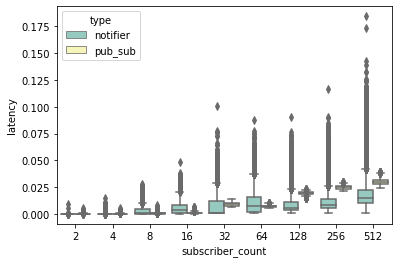

In [6]:
bp = sns.boxplot(x="subscriber_count", y="latency", hue="type",data=df, palette="Set3")
bp

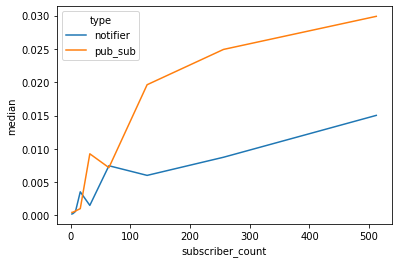

In [7]:
line_plot_with_median_df = DataframeUtils.create_median_dataframes(notifier_dfs, pub_sub_dfs, "median")
lp_mode = sns.lineplot(data=line_plot_with_median_df, x="subscriber_count", y="median", hue="type")

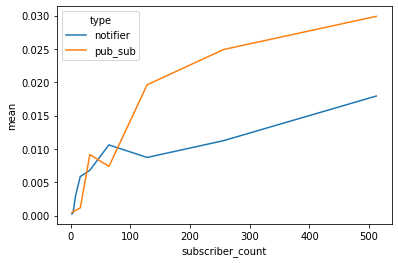

In [8]:
line_plot_with_mean_df = DataframeUtils.create_median_dataframes(notifier_dfs,pub_sub_dfs, "mean")
lp_mean = sns.lineplot(data=line_plot_with_mean_df, x="subscriber_count", y="mean", hue="type")